# Отток клиентов

# Описание проекта

Необходимо исследовать отток клиентов компании провайдера интернет и телефонных услуг. По имеющимся данным:

 -  Информация о контрактах
 -  Личная информация о пользователях
 -  Информация о использовании интернет услуг
 -  Информация о использовании телефонных услуг
 
построить модель, которая будет предсказывать откажется ли клиент от услуг компании или нет.

В ходе выполнения проекта, необходимо провести предпоготовку данных и подготовить данные к обучению: удалить пропуски, изменить формат столбцов, произвести обработку категориальных признаков. Построить модель классификации пользователей, в качестве метрики для оценки модели использовать AUC-ROC.

# План работы
  **1. Провести предобработку данных.**
  Привести данные к нужному формату, избавиться от пропусков при возможности, выделить целевой признак.
  
  **2. Исследовать даннные.**
  Рассмотреть данные, выявить аномалии при наличии, поиск взаимосвязей.
  
  **3. Подготовка признаков и выборок.**
  
  Разбить выборку, на обучающуюся, валидационную и тестовую, привести признаки к подходящему виду для обучения моделей, избавиться от пропусков при необходимости, применить кодирование для категориальных признаков и масштабировать числовые данные.
  
  **4. Построение моделей.**
  Построить разные модели, по метрике AUC_ROC, выбрать лучшую.
  
  **5. Вывод**
  Подвести итоги.

## Исследовательский анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


In [6]:
data_contract = pd.read_csv('/datasets/final_provider/contract.csv')
data_personal = pd.read_csv('/datasets/final_provider/personal.csv')
data_phone = pd.read_csv('/datasets/final_provider/phone.csv')
data_internet = pd.read_csv('/datasets/final_provider/internet.csv')
datasets = [data_contract,data_personal,data_phone,data_internet]

In [4]:
for data in datasets:
    display(data.info())
    display(data.describe())
    display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,1134-YWTYF,No
freq,1,3390


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,1134-YWTYF,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


#### Комментарий
Всего клиентов компании - 7043.


**CONTRACT**
 - Перевести BeginDate, EndDate в формат дат. Рассчитать время использования услугами связи для каждого клиента.
 - Добавить целевой признак Churn , если EndDate: 'No' - 0, если есть дата, то - 1.
 - Total_charges в формате string, а не float. Разобраться и привести к float.
 
**PHONE**
 - Всего использовавших услуги телефонной связи 6361.  
 
**INTERNET**
 - Всего использовавших услуги интернет-связи 5517.

###  Предобработка данных

Добавим целевой признак

In [6]:
#Добавление целевого признака
data_contract['Churn'] = data_contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)
data_contract['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Приведем даты к формату datetime

In [7]:
#Приведение даты начала пользования услуг к формату дат. 
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'])

In [8]:
#Приведение даты окончания пользования услуг к формату дат. Значения 'No' будут заменены на дату выгрузки файлов - 2020-02-01
try:
    data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'],errors='coerce')
except:
    pass
end = pd.to_datetime('2020-02-01')
data_contract['EndDate'] = data_contract['EndDate'].fillna(end)

В качестве признака для обучения моделей добавим столбец с кол-вом дней, которые пользователи используют услуги компании.

In [9]:
#Создание столбца типа int с кол-вом дней пользования услугами компании. 
data_contract['UsingDays'] = data_contract['EndDate'] - data_contract['BeginDate']
data_contract['UsingDays'] = data_contract['UsingDays'].dt.days

Перевод столбца **TotalCharges** к типу float. Но т.к. в данных есть строки с пропущенными значениями : ' ', необходимо разобраться в причинах их возниконовения. Как видно из таблицы, пропущенные значения связаны с тем, что контракты заключены в день выгрузки данных. Поэтому заолнение TotalChatges в соответсвии с типом договора.

In [10]:
print(len(data_contract[data_contract['TotalCharges'] == ' ']))
display(data_contract[data_contract['TotalCharges'] == ' '])

mask = (data_contract.Type == 'Two year') &  (data_contract.TotalCharges == ' ')
column_name = 'TotalCharges'
data_contract.loc[mask, column_name] = 24*data_contract.MonthlyCharges

mask = (data_contract.Type == 'One year') &  (data_contract.TotalCharges == ' ')
column_name = 'TotalCharges'
data_contract.loc[mask, column_name] = 12*data_contract.MonthlyCharges

data_contract['TotalCharges'] = data_contract['TotalCharges'].astype(float)

print(len(data_contract[data_contract['TotalCharges'] == ' ']))
print(data_contract.info())

11


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,UsingDays
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0,0


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   int64         
 9   UsingDays         7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB
None


C:\Users\rusta\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Объединение данных в польный датасет  - data_full. Присоединение таблиц будет осуществляться по CustomerID.
Я считаю, что в качестве признака для построения модели можно будет использовать тип услуг которымси пользовался клиент:
только интернет, только телефон или обе услуги, поэтому я добавлю их в полный датасет.



In [12]:
data_internet['TypeService'] = data_internet['customerID'].apply(lambda x: 'Internet+Phone' if x in data_phone['customerID'].unique() else 'Internet')
data_internet['TypeService'].value_counts()

Internet+Phone    4835
Internet           682
Name: TypeService, dtype: int64

Объединим датасеты

In [13]:
## датасет объединяющий данные о интернет и телефонных услугах.
data_internet_and_phone = data_internet.merge(data_phone,on = 'customerID', how = 'outer')

In [14]:
data_internet_and_phone['TypeService'] = data_internet_and_phone['TypeService'].fillna('Phone')
data_internet_and_phone['TypeService'].value_counts()

Internet+Phone    4835
Phone             1526
Internet           682
Name: TypeService, dtype: int64

In [15]:
data_full = pd.merge(pd.merge(data_contract,data_internet_and_phone,on = 'customerID'),data_personal,on = 'customerID')
print(data_full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   int64         
 9   UsingDays         7043 non-null   int64         
 10  InternetService   5517 non-null   object        
 11  OnlineSecurity    5517 non-null   object        
 12  OnlineBackup      5517 non-null   object        
 13  DeviceProtection  5517 non-null   object        
 14  TechSupport       5517 n

In [16]:
##  data_full - датасет включающий в себя все представленные датасеты.
data_full.to_csv('data_full.csv')


### Исследование данных

Исследуем какие типы услуг и тарифы используют клиенты, а также какая группа клиентов чаще разрывает договор.

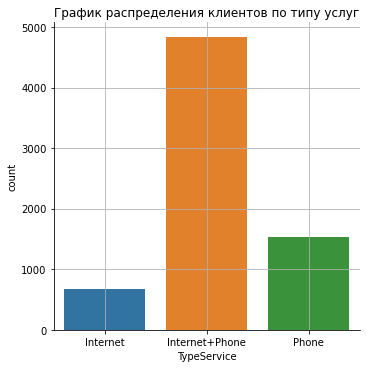

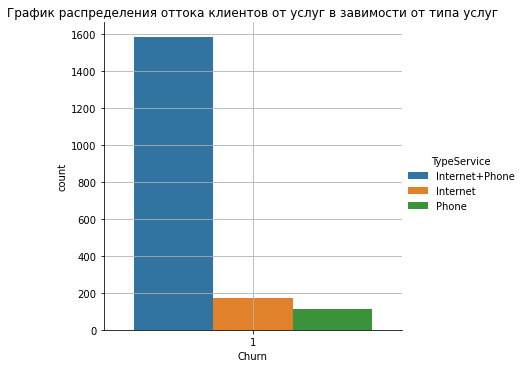

In [17]:
ax = sns.catplot(x ='TypeService', kind = 'count', data=data_full)
plt.title('График распределения клиентов по типу услуг')
plt.grid()
plt.show()

ax = sns.catplot(x="Churn", kind = 'count', hue ='TypeService', data=data_full[data_full['Churn']==1])
plt.title('График распределения оттока клиентов от услуг в завимости от типа услуг')
plt.grid()
plt.show()

#### Комментарий
Как видно из графиков среди клиентов наибольшей популярностью пользуются комбинированные услуги: интернет+телефония, только телефония более чем в 2 раза популярнее только интернет услуг. Наибольший отток наблюдается в комбинированной категории, а пользователи только определенных типов услуг распределенны примерно равно.

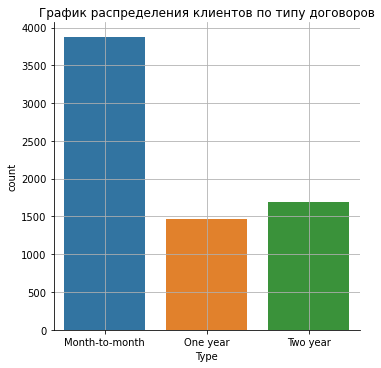

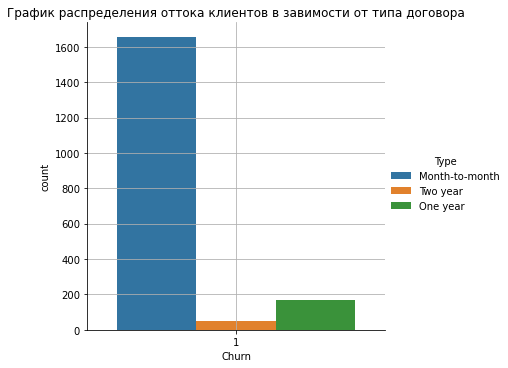

In [18]:
ax = sns.catplot(x ='Type', kind = 'count', data=data_full)
plt.title('График распределения клиентов по типу договоров')
plt.grid()
plt.show()

ax = sns.catplot(x="Churn", kind = 'count', hue ='Type', data=data_full[data_full['Churn']==1])
plt.title('График распределения оттока клиентов в завимости от типа договора')
plt.grid()
plt.show()


#### Комментарий
Большинство клиентов заключают месячные договоры,  кол-во договоров на 1 и 2 года примерно равны. Касательно разрывов, то большинство разрывов связано тоже с месячными контрактами, разрывов 1 и 2 летних контрактов существенно меньше.

Построим зависимость оттока клиентов от кол-ва дней, которые они ползуются услугуами компании.

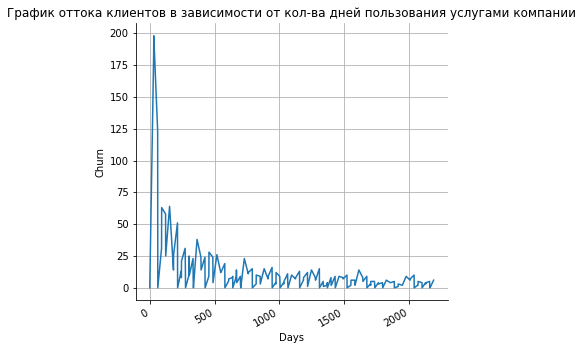

In [19]:
ax = sns.relplot(kind="line", data=data_full.groupby('UsingDays')['Churn'].sum())
ax.fig.autofmt_xdate()
plt.title('График оттока клиентов в зависимости от кол-ва дней пользования услугами компании')
plt.xlabel('Days')
plt.ylabel('Churn')
plt.grid()
plt.show()

#### Комментарий
График свидетельсвует о том, что большинство отказов от услуг в происходят начале пользования, чем больше клиент пользуется услугами тем, меньше вероятность, что он откажется от них.  

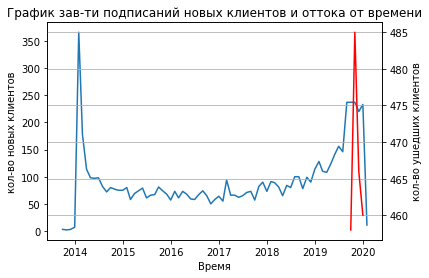

In [20]:
fig, ax = plt.subplots()
ax.plot(data_full.groupby('BeginDate')['BeginDate'].count()[:'2020-02-01'])
plt.ylabel('кол-во новых клиентов')
plt.xlabel('Время')
ax2 = ax.twinx()
ax2.plot(data_full.groupby('EndDate')['EndDate'].count()[:'2020-01-31'], color = 'red')
plt.grid()
plt.title('График зав-ти подписаний новых клиентов и оттока от времени')
plt.ylabel('кол-во ушедших клиентов')
plt.show()

#### Комментарий
График демонстрирует кол-во подписаний новых клиентов и отток клиентов в зависимости с течением времени. Очевидно, что проблемы с оттоком клиентов стали появляться ближе к концу 2019 года, хотя в это время и начался рост новых клиентов.

### Комментарий
Были исследованы некоторые из зависимостей представленных данных, следующий шаг подготовка признаков и построения моделей.

##  Построение моделей

### Подготовка признаков и разбиение на выборки

In [21]:
# customerID, BeginDate, EndDate в качестве признаков не понадобятся.
# необходимо произвести кодирование признаков категориальных и избавиться от пропусков -> 0.
data_full.info()
data_full.drop(['customerID','BeginDate','EndDate'], axis = 1, inplace = True)
data_full = data_full.fillna('No')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   int64         
 9   UsingDays         7043 non-null   int64         
 10  InternetService   5517 non-null   object        
 11  OnlineSecurity    5517 non-null   object        
 12  OnlineBackup      5517 non-null   object        
 13  DeviceProtection  5517 non-null   object        
 14  TechSupport       5517 n

In [22]:
# Заполнение пропусков возникших в результате соединения таблиц.
data_full = data_full.fillna('No')

Закодируем категориальные признаки при помощи порядкового кодирования.

In [23]:
# Для кодирования признаков было использовано порядковое кодирвание.
encoding_columns = ['Type','PaperlessBilling','PaymentMethod','InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                    'TypeService','MultipleLines','gender','Partner','Dependents']
encoder = OrdinalEncoder()
encoder.fit(data_full[encoding_columns])
data_ordinal = pd.DataFrame(encoder.transform(data_full[encoding_columns]),columns=encoding_columns)
data_full[encoding_columns] = data_ordinal[encoding_columns]

Также необходимо проверить корреляцию между количественными признаками

In [25]:
display(data_full[['TotalCharges','UsingDays','MonthlyCharges','Churn']].corr())
data_full.drop(['TotalCharges'], axis = 1, inplace = True)

,TotalCharges,UsingDays,MonthlyCharges,Churn
TotalCharges,1.000000,0.825622,0.651262,-0.198823
UsingDays,0.825622,1.000000,0.247754,-0.352673
MonthlyCharges,0.651262,0.247754,1.000000,0.193356
Churn,-0.198823,-0.352673,0.193356,1.000000


#### Комментарий 
TotalCharges и UsingDays сильно коррелируют между собой, что вполне логично и может привести к ухудшению точности предсказания моделей, поэтому я принял решение избавиться от признака TotalCharges и оставить только UsingDays.

**Разбиение на выборки.**

Я разбиваю данные на тестовую и обучающую выборки в соотношении 1:4.
Во время поиска моделей планирую использовать кросс-валидацию, поэтому в явном виде не задаю валидационную выборку.

In [26]:
train, test = train_test_split(data_full, shuffle=True, test_size=0.2, random_state = 12345)
print(train.shape)
print(test.shape)

features_train = train.drop(['Churn'], axis=1)
target_train = train['Churn']

features_test = test.drop(['Churn'], axis=1)
target_test = test['Churn']

(5634, 19)
(1409, 19)


In [27]:
train.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn',
       'UsingDays', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'TypeService', 'MultipleLines', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents'],
      dtype='object')

### Построение моделей

Поиск наилучших гиперпараметров для моделей будет осуществляться при помощи решетчатого поиска с кросс-валидацией.

plot_importances - функция для построения значимости признаков для моделей.

In [28]:
def plot_importances(feature_importances):
    columns_name = data_full.columns.tolist()
    columns_name.remove('Churn')
    df = pd.DataFrame(columns = ['features','importances'])
    df['features'] = columns_name
    df['importances'] = feature_importances
    sns.barplot(data=df.sort_values(by='importances', ascending=False), x='importances', y='features')
    plt.show()

### Логистическая регрессия

Для начала обучим модель на основе логистической регрессии.

In [29]:

params = {
    'C':[0.1,1,10, 20, 50],
    'max_iter':[300,400,800,1000,1200]
}

In [30]:
%%time
log_reg_model = GridSearchCV(LogisticRegression(random_state = 12345), params, cv = 5, scoring='roc_auc')
log_reg_model.fit(features_train, target_train)
log_reg_model.best_estimator_

Wall time: 6.29 s


LogisticRegression(C=0.1, max_iter=300, random_state=12345)

In [31]:
log_probabilities = log_reg_model.predict_proba(features_test)[:,1]
log_predictions = log_reg_model.predict(features_test)
print('AUC_ROC: {:.3f}'.format(roc_auc_score(target_test, log_probabilities)))
print('Accuracy: {:.3f}'.format(accuracy_score(target_test, log_predictions)))


AUC_ROC: 0.841
Accuracy: 0.805


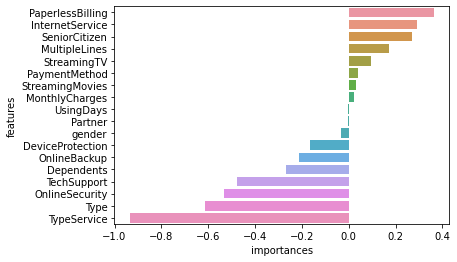

In [33]:
plot_importances(log_reg_model.best_estimator_.coef_.tolist()[0])

#### Комментарий
Логистическая регрессия дает результат AUC_ROC 0.84, что можно считать удоволетворительным результатом.

### RandomForrestClassifier

Теперь перейдем к моделе на основе случайного леса

In [34]:
params = {'n_estimators': [200, 400, 800, 1000],'max_depth':[4,6,8,10,12],}

In [35]:
%%time
forest = RandomForestClassifier(random_state = 12345)
forest_search = GridSearchCV(forest, params, cv=5, scoring = 'roc_auc')
forest_search.fit(features_train, target_train)
print(forest_search.best_score_)
print(forest_search.best_estimator_)

0.8604633619185096
RandomForestClassifier(max_depth=8, n_estimators=400, random_state=12345)
Wall time: 2min 35s


In [36]:
forest_probabilities = forest_search.predict_proba(features_test)[:,1]
forest_predictions = forest_search.predict(features_test)
print('AUC_ROC: {:.3f}'.format(roc_auc_score(target_test, forest_probabilities)))
print('Accuracy: {:.3f}'.format(accuracy_score(target_test, forest_predictions)))

AUC_ROC: 0.861
Accuracy: 0.820


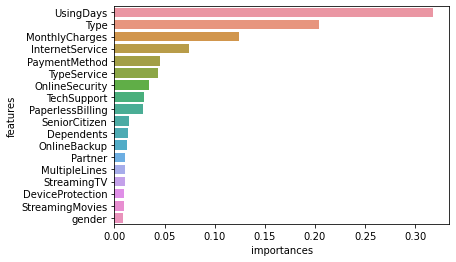

In [37]:
plot_importances(forest_search.best_estimator_.feature_importances_)

#### Комментарий
Случайный лес при помощи решетчатого поиска с перекрестной проверкой с перекрестной проверкой позволяет достигнуть значение метрики AUC_ROC: 0.861, также наблюдается рост точности по отношению к логистической регрессии. 

### CatBoostClassifier

Теперь применим модель градиентного бустинга из библиотке catboost

In [38]:
%%time
cat_model = CatBoostClassifier(random_state = 12345, eval_metric='AUC:hints=skip_train~false',verbose = 100)
params_cat = {
          'max_depth':[4,5,6,8,10,12],
          'iterations':[100,200,300,400],
               'learning_rate':[0.1]
          
}


cat_boost_search = cat_model.grid_search(params_cat, 
                                       X=features_train, 
                                       y=target_train, 
                                       plot=None,
                                        cv = 5,
                                        verbose = 10)



bestTest = 0.8896019565
bestIteration = 99

0:	loss: 0.8896020	best: 0.8896020 (0)	total: 442ms	remaining: 10.2s

bestTest = 0.9171846011
bestIteration = 199


bestTest = 0.9260393827
bestIteration = 289


bestTest = 0.9301294485
bestIteration = 395


bestTest = 0.8920960533
bestIteration = 99


bestTest = 0.9171129195
bestIteration = 184


bestTest = 0.9218017372
bestIteration = 299


bestTest = 0.9241840951
bestIteration = 380


bestTest = 0.8880376117
bestIteration = 99


bestTest = 0.9127002867
bestIteration = 183


bestTest = 0.9165963906
bestIteration = 297

10:	loss: 0.9165964	best: 0.9301294 (3)	total: 12.6s	remaining: 14.9s

bestTest = 0.9168451678
bestIteration = 399


bestTest = 0.8787063586
bestIteration = 99


bestTest = 0.906445016
bestIteration = 181


bestTest = 0.9078744308
bestIteration = 237


bestTest = 0.9078744308
bestIteration = 237


bestTest = 0.8719682914
bestIteration = 99


bestTest = 0.8895787654
bestIteration = 199


bestTest = 0.8908774667
bestIteration 

In [39]:
print(cat_model.get_params())

{'verbose': 100, 'eval_metric': 'AUC:hints=skip_train~false', 'random_state': 12345, 'depth': 4, 'iterations': 400, 'learning_rate': 0.1}


In [40]:
catboost_probabilities = cat_model.predict_proba(features_test)[:,1]
catboost_predictions = cat_model.predict(features_test)
print('AUC_ROC: {:.3f}'.format(roc_auc_score(target_test, catboost_probabilities)))
print('Accuracy: {:.3f}'.format(accuracy_score(target_test, catboost_predictions)))

AUC_ROC: 0.924
Accuracy: 0.883


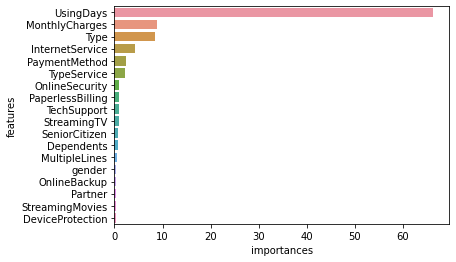

In [41]:
plot_importances(cat_model.get_feature_importance())

#### Комментарий
Бустинг деревьев от библиотеки CatBoost поднял метрику AUC_ROC до 0.924, а точность до 0.883, что является лучшим результатом среди исследуемых моделей. 

## Общий вывод
В ходе выполнения работы были произведены: данные были исследованы, подготовлены к анализу, были построены модели. Было рассмотрено 3 модели: логистическая регрессия, случайный лес и градиентный бустинг от библиотеки CatBoost. Наивысшее значение метрики AUC_ROC было получено с помощью модели на основе градиентного бустинга и составило 0.924. Полученная модель может использоваться для предсказания будет ли клиент рассторгать договор или нет.